In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "Tushar010@",
                            database = "Ecommerce")

cur = db.cursor()


#  1. List all the cities where customers are located.

In [4]:
query = """SELECT DISTINCT customer_city FROM Ecommerce.customers"""

cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2. Count the number of orders placed in 2017.

In [13]:
query = """ Select count(order_id) from Ecommerce.orders where year(order_purchase_timestamp) = 2017"""
ORquery = """ Select count(order_id) from Ecommerce.orders where order_purchase_timestamp like '2017%' """

#cur.execute(query)
#data = cur.fetchall()
#data[0][0]

cur.execute(ORquery)
data1 = cur.fetchall()
data1[0][0]

90202

# 3. Find the total sales per category.

In [20]:
query = """SELECT p.product_category category, sum(pay.payment_value) sales
FROM products p 
Join order_items o
ON p.product_id = o.product_id
Join payments as pay
ON pay.order_id = o.order_id
Group by p.product_category"""

cur.execute(query)
data = cur.fetchall()
#data

df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,perfumery,5.067387e+05
1,Furniture Decoration,1.430176e+06
2,telephony,4.868821e+05
3,bed table bath,1.712554e+06
4,automotive,8.522943e+05
...,...,...
69,cds music dvds,1.199430e+03
70,La Cuisine,2.913530e+03
71,Fashion Children's Clothing,7.856700e+02
72,PC Gamer,2.174430e+03


# 4. Calculate the percentage of orders that were paid in installments.

In [24]:
query = """Select (count(case when payment_installments > 1 then 1 end) * 100.0)/count(payment_installments) as percentage
 from Ecommerce.payments """

cur.execute(query)
data = cur.fetchall()
data[0][0]

Decimal('49.41763')

# 5. Count the number of customers from each state. 

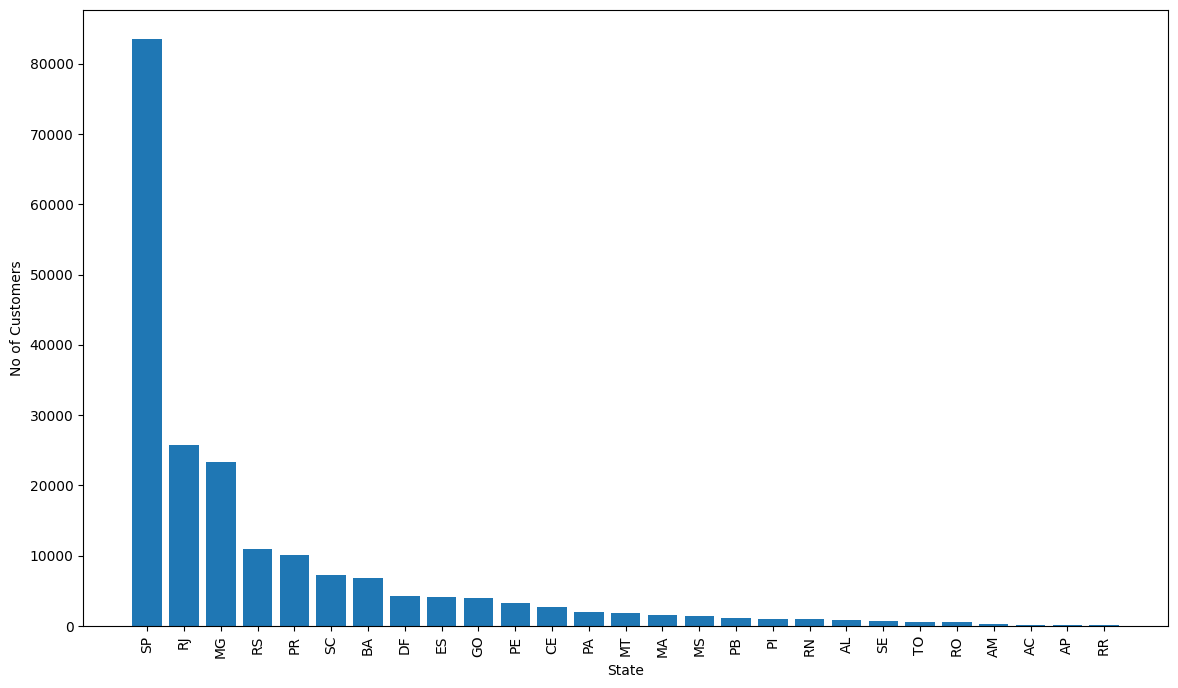

In [38]:
query = """select customer_state, count(customer_id) No_of_customers
from Ecommerce.customers
Group by customer_state """

cur.execute(query)
data = cur.fetchall()
#data
#df = pd.DataFrame(data, columns =["Customer_state","No_of_Customers"])
#df

#bar-plot
df = pd.DataFrame(data, columns =["Customer_state","No_of_Customers"])
df = df.sort_values(by = "No_of_Customers", ascending = False)
plt.figure(figsize = (14,8))
plt.bar(df["Customer_state"],df["No_of_Customers"])
plt.xticks(rotation = 90)
plt.ylabel("No of Customers")
plt.xlabel("State")
plt.show()

# 6. Calculate the number of orders per month in 2018.

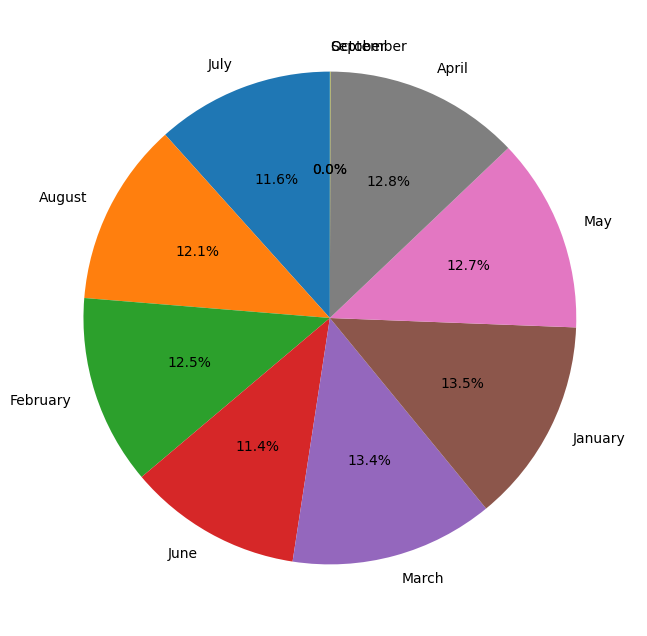

In [90]:
query = """select monthname(order_purchase_timestamp) months, count(order_id) Total_orders from Ecommerce.orders
where year(order_purchase_timestamp) = 2018
group by months"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Month_Name","No_of_Orders"])
plt.figure(figsize=(8, 8))
plt.pie(df["No_of_Orders"], labels=df["Month_Name"], autopct='%1.1f%%', startangle=90)
plt.show()
#df = df.sort_values(by = "Month_Name",ascending = True)
#df

#o = ["January","February","March","April","May","June","July","August","September","October"]
# plt.figure(figsize = (10,7))
# plt.bar(df["Month_Name"],df["No_of_Orders"])
# plt.xticks(rotation = 90)
# plt.xlabel("Months")
# plt.ylabel("Orders")
# plt.show()

#plt.figure(figsize = (10,7))
#ax = sns.barplot(x = df["Month_Name"], y = df["No_of_Orders"], data = df, order = o)
#plt.xticks(rotation = 45)
#plt.xlabel("Months")
#plt.ylabel("Orders")
#ax.bar_label(ax.containers[0])
#plt.show()

# 7. Find the average number of products per order, grouped by customer city.

In [73]:
query =""" with cpo as(
select orders.order_id,orders.customer_id,count(order_items.order_id) oc
from Ecommerce.orders
join Ecommerce.order_items
on orders.order_id = order_items.order_id
group by orders.order_id,orders.customer_id
)

select customers.customer_city, round(avg(cpo.oc),3) as av
from Ecommerce.customers
join cpo
on customers.customer_id = cpo.customer_id
group by customers.customer_city 
order by av"""

cur.execute(query)
data = cur.fetchall()
#data
df = pd.DataFrame(data, columns = ["City","Average_orders"])
df.head(10)

,City,Average_orders
0,ulianopolis,2.000
1,adustina,2.000
2,patrocinio paulista,2.000
3,perpetuo socorro,2.000
4,santa maria do salto,2.000
5,abatia,2.000
6,pontalinda,2.000
7,capitao andrade,2.000
8,ewbank da camara,2.000
9,simolandia,2.000


# 8. Calculate the percentage of total revenue contributed by each product category.

In [85]:
query = """with cte as
(SELECT p.product_category category, round(sum(pay.payment_value),3) sales
FROM ecommerce.products p 
Join ecommerce.order_items o
ON p.product_id = o.product_id
Join ecommerce.payments as pay
ON pay.order_id = o.order_id
Group by p.product_category)
select cte.category, round(((cte.sales)*100.0/(select sum(cte.sales) from cte)),3) percentage_contribution
From cte
Group by cte.category
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Product_Category","Percentage"])
df = df.sort_values(by = "Percentage", ascending = False)
df["Product_Category"] = df["Product_Category"].str.title()
df.head(10)

,Product_Category,Percentage
3,Bed Table Bath,8.433
11,Health Beauty,8.161
5,Computer Accessories,7.806
1,Furniture Decoration,7.042
15,Watches Present,7.038
19,Sport Leisure,6.855
6,Housewares,5.391
4,Automotive,4.197
26,Garden Tools,4.128
10,Cool Stuff,3.839


# 9. Identify the correlation between product price and the number of times a product has been purchased.

In [95]:
query = """select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])


the correlation is -0.10631514167157562


# 10. Calculate the total revenue generated by each seller, and rank them by revenue.

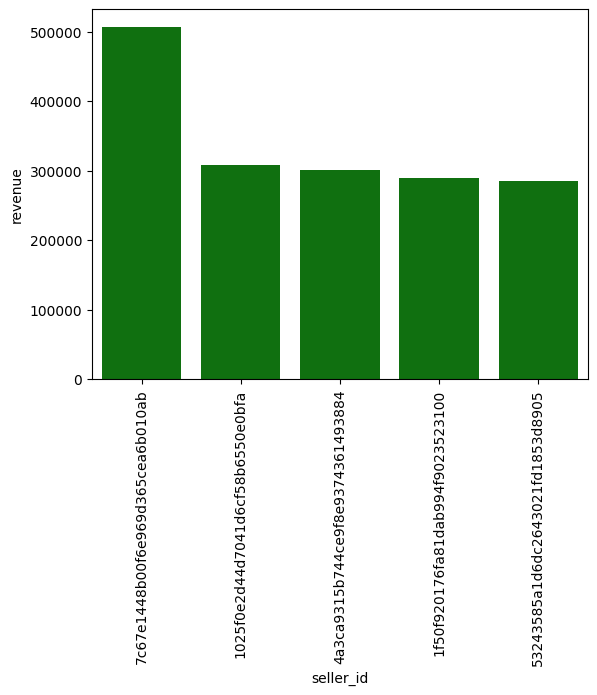

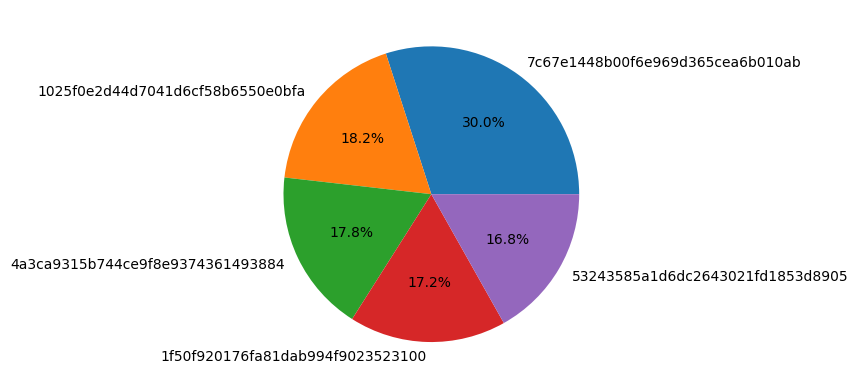

In [100]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df, color = "green")
plt.xticks(rotation = 90)
plt.show()

plt.pie(df["revenue"], labels=df["seller_id"], autopct='%1.1f%%')
plt.show()

# 11. Calculate the cumulative sales per month for each year.

In [106]:
query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Year","Month","Payement","Total"])
df = df.sort_values(by = "Total", ascending = True)
df

,Year,Month,Payement,Total
0,2016,9,504.48,504.48
1,2016,10,118180.96,118685.44
2,2016,12,39.24,118724.68
3,2017,1,276976.08,395700.76
4,2017,2,583816.02,979516.78
5,2017,3,899727.20,1879243.98
6,2017,4,835576.06,2714820.04
7,2017,5,1185837.64,3900657.68
8,2017,6,1022552.76,4923210.44
9,2017,7,1184765.84,6107976.28


# 12. Calculate the year-over-year growth rate of total sales.

In [112]:
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Years", "Growth"])
#plt.pie(df["Growth"], labels = df["Years"])
#plt.show()
df

,Years,Growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# 13. Identify the top 3 customers who spent the most money in each year.

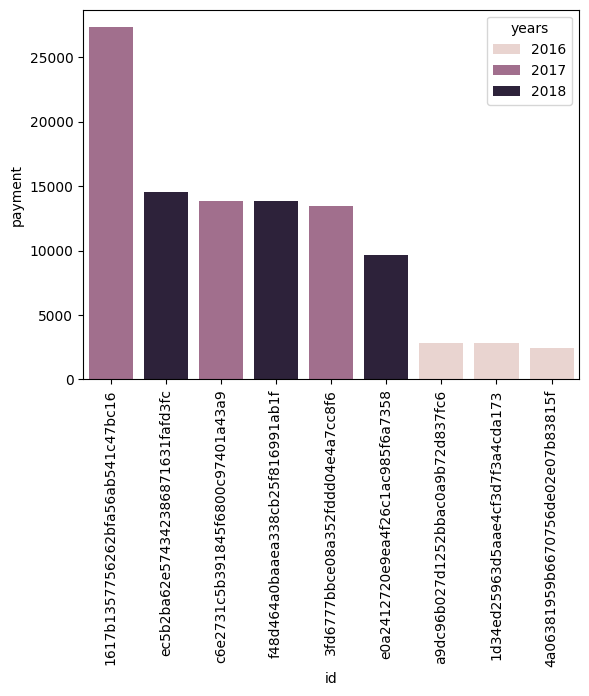

In [115]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
df = df.sort_values(by = "payment", ascending = False)
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()